### Final Models Comparison
The models trained with the optimal hyperparameters are validated and compared to assess the best-performing model.

In [78]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import shutil
import image_transformation_functions as transf_func

In [79]:
# set folder paths
models_folder = "C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/FinalModels/"
model_results_folder = "C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/ModelResults/"
data_yaml_file = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data.yaml"

## YOLOv8x

Two YOLOv8x models were trained, one with early stopping after 10 epochs and one with early stopping after 20 epochs.

In [50]:
# DF for 10-epoch early stopping model
v8_10_epochs_results = pd.read_csv(f"{model_results_folder}yolov8_10_epoch_results.csv")
v8_10_epochs_results = v8_10_epochs_results.rename(columns=lambda x: x.strip())

# DF for 20-epoch early stopping model
v8_20_epochs_results = pd.read_csv(f"{model_results_folder}yolov8_20_epoch_results.csv")
v8_20_epochs_results = v10_20_epochs_results.rename(columns=lambda x: x.strip())

In [296]:
# list the number of epochs each model was trained for
print(f"YOLOv8x model with 10-epoch early stopping trained for {len(v8_10_epochs_results)} epochs")
print(f"YOLOv8x model with 10-epoch early stopping trained for {len(v8_20_epochs_results)} epochs")

YOLOv8x model with 10-epoch early stopping trained for 26 epochs
YOLOv8x model with 10-epoch early stopping trained for 77 epochs


#### Validation
Validate on validation set first

In [82]:
# function for calculating mAP50 for all classes, priority classes and lower-priority classes
def calc_map50_class_groups(metrics_object):
    priority_classes = [metrics_object.box.ap50[4], metrics_object.box.ap50[5], metrics_object.box.ap50[6], metrics_object.box.ap50[7]]
    lower_priority_classes = [metrics_object.box.ap50[2], metrics_object.box.ap50[8], metrics_object.box.ap50[1], 
                              metrics_object.box.ap50[3], metrics_object.box.ap50[0]]
    all_classes_map50 = round(metrics_object.box.map50,3)
    priority_class_map50 = round(sum(priority_classes)/len(priority_classes),3)
    lower_priority_class_map50 = round(sum(lower_priority_classes)/len(lower_priority_classes),3)
    return all_classes_map50, priority_class_map50, lower_priority_class_map50

In [84]:
# create YOLO models - 10 and 20 epoch early stopping
yolov8_10_epochs_model = YOLO(f"{models_folder}yolov8_10_epochs_model.pt")
yolov8_20_epochs_model = YOLO(f"{models_folder}yolov8_20_epochs_model.pt")

In [10]:
# validate 10-epoch early stopping model on validation set
metrics_v8_10_epochs = yolov8_10_epochs_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [06:41


                   all        359       2011      0.852      0.779      0.827      0.675
           Articulated         68        113      0.786      0.814      0.822      0.665
                   Bus         56         89      0.934       0.82      0.888      0.773
                   Car        154       1251      0.882      0.881      0.925      0.625
                 Coach         24         29      0.952      0.679      0.823      0.763
                   LGV        180        273       0.85       0.78      0.834       0.65
          Rigid 2 Axle        123        168       0.84      0.667      0.804      0.646
          Rigid 3 Axle         17         17      0.639       0.73      0.702      0.597
          Rigid 4 Axle         41         42      0.935      0.952      0.958      0.813
                  Taxi         20         29      0.847       0.69      0.689       0.54
Speed: 3.6ms preprocess, 1104.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\det

In [306]:
# mAP50 for 10-epoch early stopping YOLOv8 model
v8_10_epoch_all_classes_map50, v8_10_epoch_priority_classes_map50, v8_10_epoch_low_priority_classes_map50= calc_map50_class_groups(metrics_v8_10_epochs)
print(f"mAP50 for all classes is {v8_10_epoch_all_classes_map50}")
print(f"mAP50 for priority classes is {v8_10_epoch_priority_classes_map50}")
print(f"mAP50 for lower-priority classes is {v8_10_epoch_low_priority_classes_map50}")

mAP50 for all classes is 0.827
mAP50 for priority classes is 0.825
mAP50 for lower-priority classes is 0.829


In [12]:
# validate 20-epoch early stopping model on validation set
metrics_v8_20_epochs = yolov8_20_epochs_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [06:49


                   all        359       2011      0.864      0.754      0.844      0.688
           Articulated         68        113      0.844      0.788      0.847      0.689
                   Bus         56         89      0.926      0.798      0.903      0.796
                   Car        154       1251      0.913      0.827      0.924      0.625
                 Coach         24         29      0.953      0.695      0.882      0.804
                   LGV        180        273       0.87      0.755      0.819      0.637
          Rigid 2 Axle        123        168      0.858      0.646      0.819       0.63
          Rigid 3 Axle         17         17      0.665      0.706      0.709      0.636
          Rigid 4 Axle         41         42      0.957      0.929      0.978      0.826
                  Taxi         20         29       0.79      0.648      0.711      0.545
Speed: 3.4ms preprocess, 1126.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\det

In [308]:
# mAP50 for 20-epoch early stopping YOLOv8 model
v8_20_epoch_all_classes_map50, v8_20_epoch_priority_classes_map50, v8_20_epoch_low_priority_classes_map50= calc_map50_class_groups(metrics_v8_20_epochs)
print(f"mAP50 for all classes is {v8_20_epoch_all_classes_map50}")
print(f"mAP50 for priority classes is {v8_20_epoch_priority_classes_map50}")
print(f"mAP50 for lower-priority classes is {v8_20_epoch_low_priority_classes_map50}")

mAP50 for all classes is 0.844
mAP50 for priority classes is 0.831
mAP50 for lower-priority classes is 0.853


#### Validate on test set

In [86]:
# validate 10-epoch early stopping model on test set
test_metrics_v8_10_epochs = yolov8_10_epochs_model.val(data=data_yaml_file, split="test")

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\test\labels.cache... 180 images, 7 backgr
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [02:43


                   all        180       1005      0.835      0.785      0.819      0.639
           Articulated         36         56      0.717      0.839      0.764      0.599
                   Bus         30         45      0.879      0.867      0.892      0.797
                   Car         81        620      0.897      0.883       0.93      0.637
                 Coach         13         14      0.692      0.643      0.734      0.691
                   LGV         91        149       0.88      0.835      0.884      0.692
          Rigid 2 Axle         53         78      0.846      0.654       0.77      0.582
          Rigid 3 Axle         11         11      0.635      0.727      0.551      0.463
          Rigid 4 Axle         21         22          1      0.921      0.982      0.793
                  Taxi          9         10      0.969        0.7      0.867      0.492
Speed: 3.3ms preprocess, 894.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\dete

In [87]:
# mAP50 for 10-epoch early stopping YOLOv8 model
v8_10_epoch_all_classes_map50_test_set, v8_10_epoch_priority_classes_map50_test_set, v8_10_epoch_low_priority_classes_map50_test_set= calc_map50_class_groups(test_metrics_v8_10_epochs)
print(f"mAP50 for all classes is {v8_10_epoch_all_classes_map50_test_set}")
print(f"mAP50 for priority classes is {v8_10_epoch_priority_classes_map50_test_set}")
print(f"mAP50 for lower-priority classes is {v8_10_epoch_low_priority_classes_map50_test_set}")

mAP50 for all classes is 0.819
mAP50 for priority classes is 0.797
mAP50 for lower-priority classes is 0.838


In [17]:
# validate 20-epoch early stopping model on test set
test_metrics_v8_20_epochs = yolov8_20_epochs_model.val(data=data_yaml_file, split="test")

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\test\labels.cache... 180 images, 7 backgr
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:27


                   all        180       1005      0.841      0.787      0.808      0.637
           Articulated         36         56      0.756      0.786      0.793       0.63
                   Bus         30         45      0.881      0.867      0.884      0.785
                   Car         81        620      0.906      0.884      0.939      0.642
                 Coach         13         14       0.78      0.571      0.667      0.636
                   LGV         91        149      0.926      0.834      0.903      0.709
          Rigid 2 Axle         53         78      0.782      0.679      0.771      0.597
          Rigid 3 Axle         11         11      0.701      0.727       0.55      0.451
          Rigid 4 Axle         21         22      0.954      0.936      0.972       0.78
                  Taxi          9         10      0.885        0.8       0.79      0.507
Speed: 4.0ms preprocess, 1136.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\det

In [312]:
# mAP50 for 20-epoch early stopping YOLOv8 model
v8_20_epoch_all_classes_map50_test_set, v8_20_epoch_priority_classes_map50_test_set, v8_20_epoch_low_priority_classes_map50_test_set= calc_map50_class_groups(test_metrics_v8_20_epochs)
print(f"mAP50 for all classes is {v8_20_epoch_all_classes_map50_test_set}")
print(f"mAP50 for priority classes is {v8_20_epoch_priority_classes_map50_test_set}")
print(f"mAP50 for lower-priority classes is {v8_20_epoch_low_priority_classes_map50_test_set}")

mAP50 for all classes is 0.808
mAP50 for priority classes is 0.799
mAP50 for lower-priority classes is 0.815


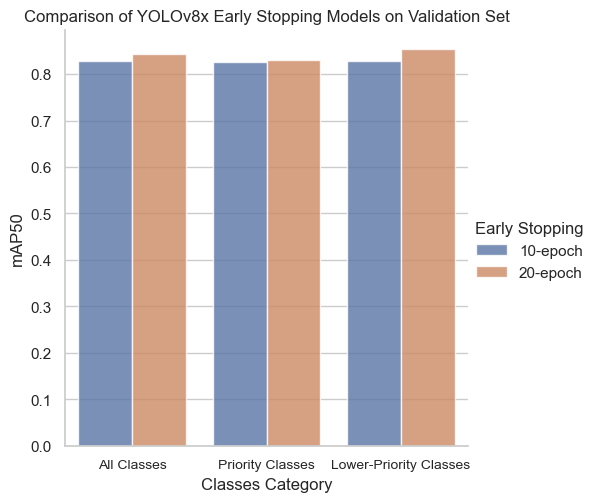

In [347]:
# df to compare mAP50 for YOLOv8 models on validation set
v8_earlystopping_val_comparison_df = pd.DataFrame(
    [["All Classes", v8_10_epoch_all_classes_map50,"10-epoch"],
    ["All Classes", v8_20_epoch_all_classes_map50,"20-epoch"],
    ["Priority Classes", v8_10_epoch_priority_classes_map50,"10-epoch"],
    ["Priority Classes", v8_20_epoch_priority_classes_map50,"20-epoch"],
    ["Lower-Priority Classes", v8_10_epoch_low_priority_classes_map50,"10-epoch"],
    ["Lower-Priority Classes", v8_20_epoch_low_priority_classes_map50,"20-epoch"]],
    columns=["Classes Category", "mAP50", "Early Stopping"])

# grouped barplot of mAP50 for classes categories
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=v8_earlystopping_val_comparison_df, x="Classes Category", y="mAP50", 
                  hue="Early Stopping", alpha=0.8).set(title="Comparison of YOLOv8x Early Stopping Models on Validation Set")
fig.set_xticklabels(fontsize=10)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/map50_validation_comparison.png", bbox_inches="tight")
plt.show()

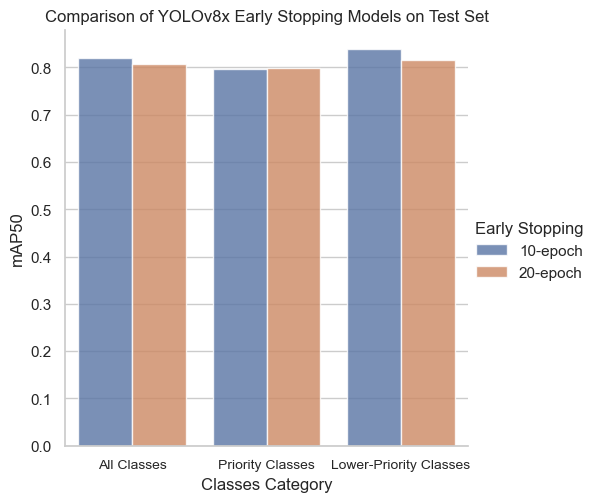

In [349]:
# df to compare mAP50 for YOLOv8 models on test set
v8_earlystopping_test_comparison_df = pd.DataFrame(
    [["All Classes", v8_10_epoch_all_classes_map50_test_set,"10-epoch"],
    ["All Classes", v8_20_epoch_all_classes_map50_test_set,"20-epoch"],
    ["Priority Classes", v8_10_epoch_priority_classes_map50_test_set,"10-epoch"],
    ["Priority Classes", v8_20_epoch_priority_classes_map50_test_set,"20-epoch"],
    ["Lower-Priority Classes", v8_10_epoch_low_priority_classes_map50_test_set,"10-epoch"],
    ["Lower-Priority Classes", v8_20_epoch_low_priority_classes_map50_test_set,"20-epoch"]],
    columns=["Classes Category", "mAP50", "Early Stopping"])

# grouped barplot of mAP50 for classes categories
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=v8_earlystopping_test_comparison_df, x="Classes Category", y="mAP50", 
                  hue="Early Stopping", alpha=0.8).set(title="Comparison of YOLOv8x Early Stopping Models on Test Set")
fig.set_xticklabels(fontsize=10)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/map50_test_comparison.png", bbox_inches="tight")
plt.show()

#### AP50 Comparison

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


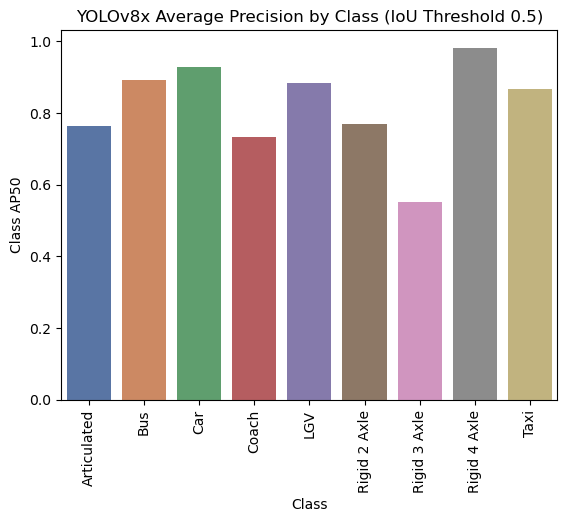

In [165]:
# barplot of AP50 for all classes, 10-epoch model
class_names = ['Articulated', 'Bus', 'Car', 'Coach', 'LGV', 'Rigid 2 Axle', 'Rigid 3 Axle', 'Rigid 4 Axle', 'Taxi']
sns.set_palette("deep")
ax = sns.barplot(x=class_names, y=test_metrics_v8_10_epochs.box.ap50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Class")
plt.ylabel("Class AP50")
plt.title("YOLOv8x Average Precision by Class (IoU Threshold 0.5)")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/average_precision_by_class.png",bbox_inches="tight")
plt.show()

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


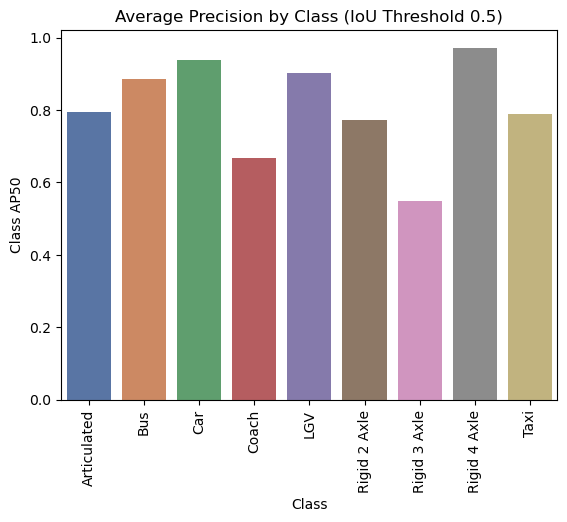

In [96]:
# barplot of AP50 for all classes, 20-epoch model
class_names = ['Articulated', 'Bus', 'Car', 'Coach', 'LGV', 'Rigid 2 Axle', 'Rigid 3 Axle', 'Rigid 4 Axle', 'Taxi']

ax = sns.barplot(x=class_names, y=test_metrics_v8_20_epochs.box.ap50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Class")
plt.ylabel("Class AP50")
plt.title("Average Precision by Class (IoU Threshold 0.5)")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/average_precision_by_class.png",bbox_inches="tight")
plt.show()

The best YOLOv8x model is the one trained for 27 total epochs with 10-epoch early stopping.

#### Multi-Vehicle Scenes Comparison

In [92]:
# set validation labels directory
labels_directory = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/labels/"

# save number of objects per image
class_labels_all_files = []
num_objects_per_file = []
for file in os.listdir(labels_directory):
    num_objects_per_file.append([file, len(transf_func.save_class_labels_from_file(f"{labels_directory}{file}"))])

# create df of number of objects per image
image_objects_df = pd.DataFrame(num_objects_per_file, columns=["file_name", "objects_per_file"])
image_objects_df

,file_name,objects_per_file
0,00001-07551_jpg.rf.42352026ee9c87fe3cf97107777...,6
1,00300_Nissan-NV-Passenger-Van-2012_jpg.rf.d150...,1
2,03609_Mercedes-Benz-Sprinter-Van-2012_jpg.rf.b...,1
3,04219_Mercedes-Benz-Sprinter-Van-2012_jpg.rf.6...,1
4,05768-1718956992_jpg.rf.de0d03eea6445fee2efdae...,35
...,...,...
354,videoframe_1655_png.rf.4a739d8cd67195a7f65ce76...,6
355,videoframe_1696_png.rf.a606af2d10891f60849da79...,3
356,videoframe_1780-1-_png.rf.7b80e7b5c82addc5d4ab...,10
357,videoframe_1924_png.rf.3420b5004d1dfb4e8ae50c0...,3


#### Separate Validation images into categories of number of vehicles per image

In [101]:
# set directory for copying multi-vehicle images
multi_vehicle_directory0_10 = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/multi_vehicle_0_10/"
multi_vehicle_directory11_20 = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/multi_vehicle_11_20/"
multi_vehicle_directory21_30 = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/multi_vehicle_21_30/"
multi_vehicle_directory31_40 = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/multi_vehicle_31_40/"
multi_vehicle_directory41 = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/multi_vehicle_41/"

validation_image_directory = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/images/"
validation_labels_directory = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/valid/labels/"

In [103]:
# copy files to category of vehicles per image
# 0-10
for file in image_objects_df[image_objects_df["objects_per_file"]<=10]["file_name"]:
    shutil.copyfile(f"{validation_image_directory}{file[:-4]}.jpg", f"{multi_vehicle_directory0_10}images/{file[:-4]}.jpg")
    shutil.copyfile(f"{validation_labels_directory}{file}", f"{multi_vehicle_directory0_10}labels/{file}")
    
# 11-20
for file in image_objects_df[(image_objects_df["objects_per_file"]>10) & (image_objects_df["objects_per_file"]<=20)]["file_name"]:
    shutil.copyfile(f"{validation_image_directory}{file[:-4]}.jpg", f"{multi_vehicle_directory11_20}images/{file[:-4]}.jpg")
    shutil.copyfile(f"{validation_labels_directory}{file}", f"{multi_vehicle_directory11_20}labels/{file}")

# 21-30
for file in image_objects_df[(image_objects_df["objects_per_file"]>20) & (image_objects_df["objects_per_file"]<=30)]["file_name"]:
    shutil.copyfile(f"{validation_image_directory}{file[:-4]}.jpg", f"{multi_vehicle_directory21_30}images/{file[:-4]}.jpg")
    shutil.copyfile(f"{validation_labels_directory}{file}", f"{multi_vehicle_directory21_30}labels/{file}")

# 31-40
for file in image_objects_df[(image_objects_df["objects_per_file"]>31) & (image_objects_df["objects_per_file"]<=40)]["file_name"]:
    shutil.copyfile(f"{validation_image_directory}{file[:-4]}.jpg", f"{multi_vehicle_directory31_40}images/{file[:-4]}.jpg")
    shutil.copyfile(f"{validation_labels_directory}{file}", f"{multi_vehicle_directory31_40}labels/{file}")

# 41+
for file in image_objects_df[image_objects_df["objects_per_file"]>40]["file_name"]:
    shutil.copyfile(f"{validation_image_directory}{file[:-4]}.jpg", f"{multi_vehicle_directory41}images/{file[:-4]}.jpg")
    shutil.copyfile(f"{validation_labels_directory}{file}", f"{multi_vehicle_directory41}labels/{file}")

In [111]:
# create dfs for the validation categories
multi_vehicle_directory0_10_df = transf_func.create_df_from_labels_dir(f"{multi_vehicle_directory0_10}labels/", 640, 640)
multi_vehicle_directory11_20_df = transf_func.create_df_from_labels_dir(f"{multi_vehicle_directory11_20}labels/", 640, 640)
multi_vehicle_directory21_30_df = transf_func.create_df_from_labels_dir(f"{multi_vehicle_directory21_30}labels/", 640, 640)
multi_vehicle_directory31_40_df = transf_func.create_df_from_labels_dir(f"{multi_vehicle_directory31_40}labels/", 640, 640)
multi_vehicle_directory41_df = transf_func.create_df_from_labels_dir(f"{multi_vehicle_directory41}labels/", 640, 640)

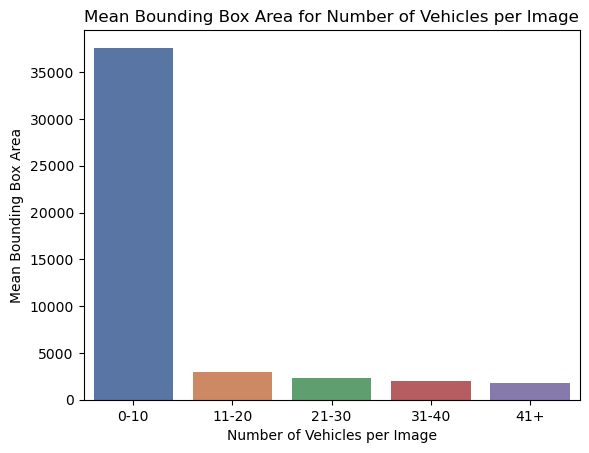

In [113]:
# barplot for mean bbox size for each category of vehicles per validation image
mean_area_df = pd.DataFrame(
    [["0-10", multi_vehicle_directory0_10_df["bbox_area"].mean()],
     ["11-20", multi_vehicle_directory11_20_df["bbox_area"].mean()],
     ["21-30", multi_vehicle_directory21_30_df["bbox_area"].mean()],
     ["31-40", multi_vehicle_directory31_40_df["bbox_area"].mean()],
     ["41+", multi_vehicle_directory41_df["bbox_area"].mean()]],
    columns=["num_veh_per_image", "mean_bbox_area"])

sns.set_palette("deep")
fig = sns.barplot(x=mean_area_df["num_veh_per_image"], y=mean_area_df["mean_bbox_area"])
fig.set_xlabel("Number of Vehicles per Image")
fig.set_ylabel("Mean Bounding Box Area")
fig.set_title("Mean Bounding Box Area for Number of Vehicles per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/mean_box_area_num_vehicles_per_image.png", bbox_inches="tight")
plt.show()

In [88]:
# set paths for yaml file for each val category
data_yaml_0_10_veh = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data_val_veh_0_10.yaml"
data_yaml_11_20_veh = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data_val_veh_11_20.yaml"
data_yaml_21_30_veh = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data_val_veh_21_30.yaml"
data_yaml_31_40_veh = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data_val_veh_31_40.yaml"
data_yaml_41_veh = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data_val_veh_41.yaml"

In [89]:
# validate 10-epoch model on 0-10 vehicles images
metrics_v8_10_epochs_0_10_veh = yolov8_10_epochs_model.val(data=data_yaml_0_10_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_0_10\labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [04:39


                   all        310        754      0.817      0.783       0.82      0.676
           Articulated         40         61      0.736      0.836      0.821      0.677
                   Bus         53         85      0.929      0.824      0.892      0.777
                   Car        105        258      0.812      0.841      0.874      0.591
                 Coach         17         22      0.927      0.579      0.752      0.701
                   LGV        141        164      0.863      0.829      0.884      0.711
          Rigid 2 Axle         82         97      0.877      0.664      0.831      0.696
          Rigid 3 Axle          8          8      0.443      0.698      0.535       0.47
          Rigid 4 Axle         41         42       0.93      0.952       0.96      0.816
                  Taxi         14         17      0.834      0.824      0.833      0.645
Speed: 3.3ms preprocess, 889.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\dete

In [90]:
# validate 10-epoch model on 11-20 vehicles images
metrics_v8_10_epochs_11_20_veh = yolov8_10_epochs_model.val(data=data_yaml_11_20_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_11_20\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<0


                   all         14        195      0.847      0.821      0.851      0.695
           Articulated         10         27      0.861      0.914      0.915      0.737
                   Bus          1          1      0.886          1      0.995      0.895
                   Car         14        110       0.94      0.745      0.907      0.641
                 Coach          2          2          1          1      0.995      0.895
                   LGV         11         29      0.865      0.886      0.883      0.672
          Rigid 2 Axle         12         16      0.814      0.822      0.878      0.701
          Rigid 3 Axle          5          5       0.96          1      0.995      0.842
                  Taxi          3          5      0.447        0.2      0.245      0.179
Speed: 2.5ms preprocess, 875.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val10


In [91]:
# validate 10-epoch model on 21-30 vehicles images
metrics_v8_10_epochs_21_30_veh = yolov8_10_epochs_model.val(data=data_yaml_21_30_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_21_30\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<0


                   all         19        473      0.806      0.548       0.62      0.483
           Articulated         12         14      0.914      0.786      0.843      0.675
                   Bus          2          3       0.91      0.667       0.83        0.7
                   Car         19        396      0.939      0.856      0.945      0.651
                 Coach          5          5          1          1      0.995      0.913
                   LGV         16         28      0.816      0.536      0.607       0.41
          Rigid 2 Axle         13         24      0.866      0.541      0.741      0.516
          Rigid 3 Axle          1          1          1          0          0          0
                  Taxi          1          2          0          0          0          0
Speed: 2.9ms preprocess, 878.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val11


In [92]:
# validate 10-epoch model on 31-40 vehicles images
metrics_v8_10_epochs_31_40_veh = yolov8_10_epochs_model.val(data=data_yaml_31_40_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_31_40\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<0


                   all         11        398      0.779      0.737      0.813      0.633
           Articulated          4          6      0.581        0.5      0.561      0.499
                   Car         11        333      0.844      0.928      0.943      0.621
                   LGV          8         33      0.687      0.606      0.711      0.539
          Rigid 2 Axle         11         23      0.784      0.826      0.854      0.643
          Rigid 3 Axle          3          3          1      0.826      0.995      0.861
Speed: 1.9ms preprocess, 941.5ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs\detect\val12


In [93]:
# validate 10-epoch model on 41+ vehicles images
metrics_v8_10_epochs_41_veh = yolov8_10_epochs_model.val(data=data_yaml_41_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_41\labels.cache... 3 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0


                   all          3        129      0.736      0.889      0.834      0.579
           Articulated          1          3      0.768      0.667      0.777        0.4
                   Car          3        100      0.812       0.97      0.952      0.635
                   LGV          3         17      0.757      0.882      0.863      0.635
          Rigid 2 Axle          3          4      0.478      0.925       0.58      0.421
                  Taxi          2          5      0.863          1      0.995      0.801
Speed: 10.5ms preprocess, 887.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val13


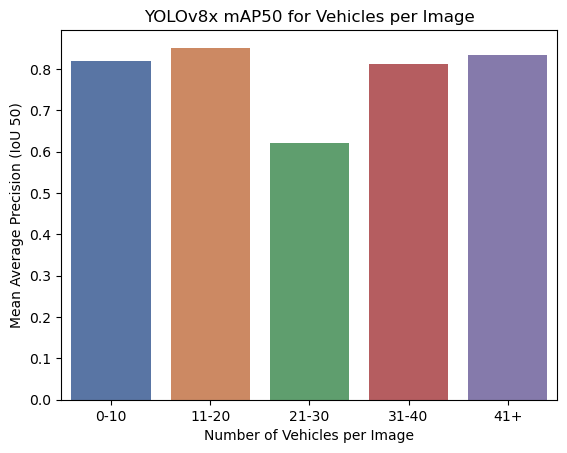

In [175]:
# barplot of mAP50 for each category of validation vehicles per image
yolov8_map50_veh_per_image_df = pd.DataFrame([
    ["0-10", metrics_v8_10_epochs_0_10_veh.box.map50],
    ["11-20", metrics_v8_10_epochs_11_20_veh.box.map50],
    ["21-30",  metrics_v8_10_epochs_21_30_veh.box.map50],
    ["31-40", metrics_v8_10_epochs_31_40_veh.box.map50],
    ["41+", metrics_v8_10_epochs_41_veh.box.map50]],
    columns=["num_veh_per_image", "map50"])

fig = sns.barplot(x=yolov8_map50_veh_per_image_df["num_veh_per_image"], y=yolov8_map50_veh_per_image_df["map50"])
fig.set_xlabel("Number of Vehicles per Image")
fig.set_ylabel("Mean Average Precision (IoU 50)")
fig.set_title("YOLOv8x mAP50 for Vehicles per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/yolov8_ap50_veh_per_image.png", bbox_inches="tight")
plt.show()

## YOLOv10x
Two YOLOv10x models were trained, one with early stopping after 10 epochs and one with early stopping after 20 epochs.

In [53]:
# DF for 10-epoch early stopping model
v10_10_epochs_results = pd.read_csv(f"{model_results_folder}yolov10_10_epoch_results.csv")
v10_10_epochs_results = v10_10_epochs_results.rename(columns=lambda x: x.strip())

# DF for 20-epoch early stopping model
v10_20_epochs_results = pd.read_csv(f"{model_results_folder}yolov10_20_epoch_results.csv")
v10_20_epochs_results = v10_20_epochs_results.rename(columns=lambda x: x.strip())

In [298]:
# list the number of epochs each model was trained for
print(f"YOLOv8x model with 10-epoch early stopping trained for {len(v10_10_epochs_results)} epochs")
print(f"YOLOv8x model with 10-epoch early stopping trained for {len(v10_20_epochs_results)} epochs")

YOLOv8x model with 10-epoch early stopping trained for 13 epochs
YOLOv8x model with 10-epoch early stopping trained for 97 epochs


#### Validation
Validate on validation set first.

In [94]:
# create YOLO models - 10 and 20 epoch early stopping
yolov10_10_epochs_model = YOLO(f"{models_folder}yolov10_10_epochs_model.pt")
yolov10_20_epochs_model = YOLO(f"{models_folder}yolov10_20_epochs_model.pt")

In [21]:
# validate 10-epoch early stopping model on validation set
metrics_v10_10_epochs = yolov10_10_epochs_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv10x summary (fused): 503 layers, 31,601,414 parameters, 0 gradients, 169.9 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [07:03


                   all        359       2011      0.788      0.691       0.78      0.601
           Articulated         68        113      0.813      0.796      0.871      0.664
                   Bus         56         89      0.836      0.745      0.844      0.717
                   Car        154       1251      0.904      0.844      0.932      0.623
                 Coach         24         29      0.935      0.497      0.729      0.614
                   LGV        180        273      0.845       0.74      0.824      0.623
          Rigid 2 Axle        123        168      0.772      0.625       0.75      0.544
          Rigid 3 Axle         17         17       0.64      0.412      0.465      0.401
          Rigid 4 Axle         41         42      0.754      0.905      0.935      0.755
                  Taxi         20         29       0.59      0.655      0.672      0.469
Speed: 3.4ms preprocess, 1163.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\det

In [357]:
# mAP50 for 10-epoch early stopping YOLOv10 model
v10_10_epoch_all_classes_map50, v10_10_epoch_priority_classes_map50, v10_10_epoch_low_priority_classes_map50= calc_map50_class_groups(metrics_v10_10_epochs)
print(f"mAP50 for all classes is {v10_10_epoch_all_classes_map50}")
print(f"mAP50 for priority classes is {v10_10_epoch_priority_classes_map50}")
print(f"mAP50 for lower-priority classes is {v10_10_epoch_low_priority_classes_map50}")

mAP50 for all classes is 0.78
mAP50 for priority classes is 0.744
mAP50 for lower-priority classes is 0.81


In [23]:
# validate 20-epoch early stopping model on validation set
metrics_v10_20_epochs = yolov10_20_epochs_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv10x summary (fused): 503 layers, 31,601,414 parameters, 0 gradients, 169.9 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [07:02


                   all        359       2011      0.866      0.751      0.832      0.685
           Articulated         68        113      0.819      0.799      0.845      0.697
                   Bus         56         89      0.912      0.817      0.891      0.789
                   Car        154       1251      0.875      0.886      0.925      0.625
                 Coach         24         29          1       0.65       0.81      0.749
                   LGV        180        273      0.859      0.758      0.831      0.652
          Rigid 2 Axle        123        168      0.851       0.69      0.825      0.647
          Rigid 3 Axle         17         17      0.746      0.529      0.654      0.577
          Rigid 4 Axle         41         42      0.953      0.969       0.98      0.841
                  Taxi         20         29      0.784      0.655      0.727      0.591
Speed: 3.0ms preprocess, 1163.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\det

In [359]:
# mAP50 for 20-epoch early stopping YOLOv10 model
v10_20_epoch_all_classes_map50, v10_20_epoch_priority_classes_map50, v10_20_epoch_low_priority_classes_map50= calc_map50_class_groups(metrics_v10_20_epochs)
print(f"mAP50 for all classes is {v10_20_epoch_all_classes_map50}")
print(f"mAP50 for priority classes is {v10_20_epoch_priority_classes_map50}")
print(f"mAP50 for lower-priority classes is {v10_20_epoch_low_priority_classes_map50}")

mAP50 for all classes is 0.832
mAP50 for priority classes is 0.822
mAP50 for lower-priority classes is 0.84


#### Validate on test set

In [26]:
# validate 10-epoch early stopping model on test set
test_metrics_v10_10_epochs = yolov10_10_epochs_model.val(data=data_yaml_file, split="test")

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\test\labels.cache... 180 images, 7 backgr
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:32


                   all        180       1005      0.784      0.657      0.757      0.579
           Articulated         36         56      0.812      0.643      0.733      0.531
                   Bus         30         45       0.87      0.742      0.866      0.751
                   Car         81        620      0.906      0.805      0.939      0.626
                 Coach         13         14       0.79       0.54      0.674      0.629
                   LGV         91        149      0.878      0.728      0.881       0.66
          Rigid 2 Axle         53         78      0.784      0.577      0.735      0.532
          Rigid 3 Axle         11         11      0.498      0.455      0.425      0.341
          Rigid 4 Axle         21         22      0.729      0.727      0.835      0.633
                  Taxi          9         10      0.793        0.7      0.727      0.508
Speed: 3.5ms preprocess, 1166.1ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\det

In [361]:
# mAP50 for 10-epoch early stopping YOLOv10 model on test set
v10_10_epoch_all_classes_map50_test_set, v10_10_epoch_priority_classes_map50_test_set, v10_10_epoch_low_priority_classes_map50_test_set = calc_map50_class_groups(test_metrics_v10_10_epochs)
print(f"mAP50 for all classes is {v10_10_epoch_all_classes_map50_test_set}")
print(f"mAP50 for priority classes is {v10_10_epoch_priority_classes_map50_test_set}")
print(f"mAP50 for lower-priority classes is {v10_10_epoch_low_priority_classes_map50_test_set}")

mAP50 for all classes is 0.757
mAP50 for priority classes is 0.719
mAP50 for lower-priority classes is 0.788


In [95]:
# validate 20-epoch early stopping model on test set
test_metrics_v10_20_epochs = yolov10_20_epochs_model.val(data=data_yaml_file, split="test")

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv10x summary (fused): 503 layers, 31,601,414 parameters, 0 gradients, 169.9 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\test\labels.cache... 180 images, 7 backgr
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [02:50


                   all        180       1005      0.835      0.794      0.817      0.647
           Articulated         36         56      0.801      0.821      0.821      0.636
                   Bus         30         45      0.802      0.867      0.887      0.798
                   Car         81        620      0.866      0.913      0.929      0.629
                 Coach         13         14      0.887      0.564      0.724      0.678
                   LGV         91        149      0.879      0.827      0.866      0.682
          Rigid 2 Axle         53         78      0.788      0.731      0.782      0.607
          Rigid 3 Axle         11         11      0.654      0.689      0.564      0.471
          Rigid 4 Axle         21         22      0.956      0.955      0.967      0.789
                  Taxi          9         10      0.886      0.776      0.809      0.533
Speed: 2.5ms preprocess, 936.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\dete

In [96]:
# mAP50 for 20-epoch early stopping YOLOv10 model on test set
v10_20_epoch_all_classes_map50_test_set, v10_20_epoch_priority_classes_map50_test_set, v10_20_epoch_low_priority_classes_map50_test_set = calc_map50_class_groups(test_metrics_v10_20_epochs)
print(f"mAP50 for all classes is {v10_20_epoch_all_classes_map50_test_set}")
print(f"mAP50 for priority classes is {v10_20_epoch_priority_classes_map50_test_set}")
print(f"mAP50 for lower-priority classes is {v10_20_epoch_low_priority_classes_map50_test_set}")

mAP50 for all classes is 0.817
mAP50 for priority classes is 0.795
mAP50 for lower-priority classes is 0.834


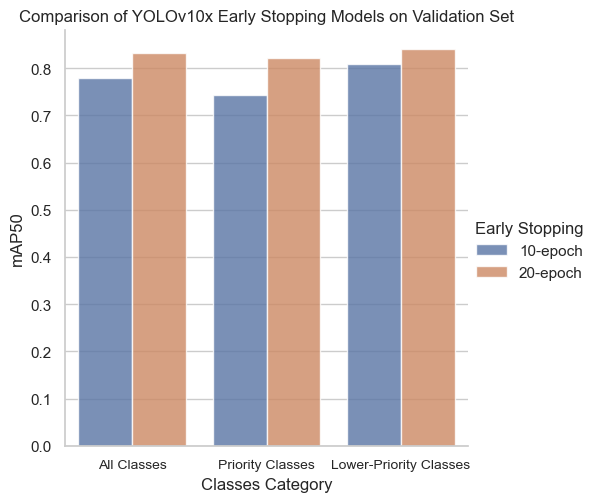

In [373]:
# df to compare mAP50 for YOLOv10 models on validation set
v10_earlystopping_val_comparison_df = pd.DataFrame(
    [["All Classes", v10_10_epoch_all_classes_map50,"10-epoch"],
    ["All Classes", v10_20_epoch_all_classes_map50,"20-epoch"],
    ["Priority Classes", v10_10_epoch_priority_classes_map50,"10-epoch"],
    ["Priority Classes", v10_20_epoch_priority_classes_map50,"20-epoch"],
    ["Lower-Priority Classes", v10_10_epoch_low_priority_classes_map50,"10-epoch"],
    ["Lower-Priority Classes", v10_20_epoch_low_priority_classes_map50,"20-epoch"]],
    columns=["Classes Category", "mAP50", "Early Stopping"])

# grouped barplot of mAP50 for classes categories
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=v10_earlystopping_val_comparison_df, x="Classes Category", y="mAP50", 
                  hue="Early Stopping", alpha=0.8).set(title="Comparison of YOLOv10x Early Stopping Models on Validation Set")
fig.set_xticklabels(fontsize=10)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/v10_map50_validation_comparison.png", bbox_inches="tight")
plt.show()

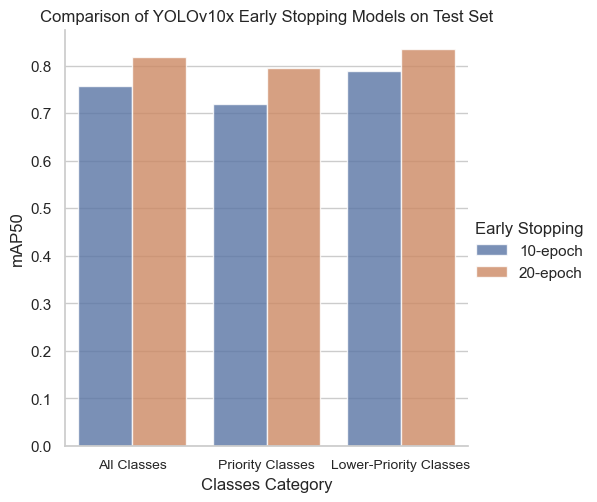

In [375]:
# df to compare mAP50 for YOLOv10 models on test set
v10_earlystopping_test_comparison_df = pd.DataFrame(
    [["All Classes", v10_10_epoch_all_classes_map50_test_set,"10-epoch"],
    ["All Classes", v10_20_epoch_all_classes_map50_test_set,"20-epoch"],
    ["Priority Classes", v10_10_epoch_priority_classes_map50_test_set,"10-epoch"],
    ["Priority Classes", v10_20_epoch_priority_classes_map50_test_set,"20-epoch"],
    ["Lower-Priority Classes", v10_10_epoch_low_priority_classes_map50_test_set,"10-epoch"],
    ["Lower-Priority Classes", v10_20_epoch_low_priority_classes_map50_test_set,"20-epoch"]],
    columns=["Classes Category", "mAP50", "Early Stopping"])

# grouped barplot of mAP50 for classes categories
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=v10_earlystopping_test_comparison_df, x="Classes Category", y="mAP50", 
                  hue="Early Stopping", alpha=0.8).set(title="Comparison of YOLOv10x Early Stopping Models on Test Set")
fig.set_xticklabels(fontsize=10)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/v10_map50_test_comparison.png", bbox_inches="tight")
plt.show()

The best YOLOv10x model is the one trained for 97 epochs with 20-epoch early stopping.

#### AP50 Comparison

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


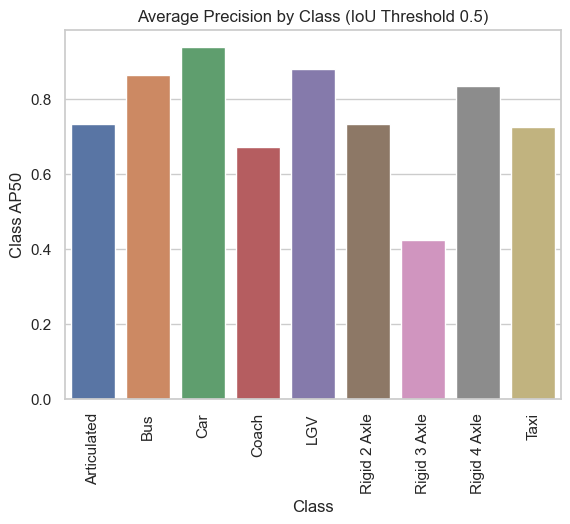

In [377]:
# barplot of AP50 for all classes, 10-epoch model
class_names = ['Articulated', 'Bus', 'Car', 'Coach', 'LGV', 'Rigid 2 Axle', 'Rigid 3 Axle', 'Rigid 4 Axle', 'Taxi']

sns.set_palette("deep")
ax = sns.barplot(x=class_names, y=test_metrics_v10_10_epochs.box.ap50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Class")
plt.ylabel("Class AP50")
plt.title("Average Precision by Class (IoU Threshold 0.5)")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/average_precision_by_class.png",bbox_inches="tight")
plt.show()

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


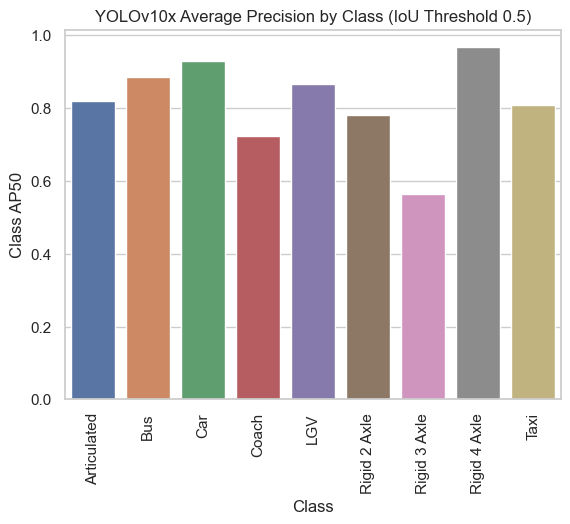

In [402]:
# barplot of AP50 for all classes, 10-epoch model
class_names = ['Articulated', 'Bus', 'Car', 'Coach', 'LGV', 'Rigid 2 Axle', 'Rigid 3 Axle', 'Rigid 4 Axle', 'Taxi']

sns.set_palette("deep")
ax = sns.barplot(x=class_names, y=test_metrics_v10_20_epochs.box.ap50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Class")
plt.ylabel("Class AP50")
plt.title("YOLOv10x Average Precision by Class (IoU Threshold 0.5)")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/average_precision_by_class.png",bbox_inches="tight")
plt.show()

#### Validation on Vehicles per Image Categories

In [97]:
# validate 20-epoch model on 0-10 vehicles images
metrics_v10_20_epochs_0_10_veh = yolov10_20_epochs_model.val(data=data_yaml_0_10_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_0_10\labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [04:52


                   all        310        754      0.834      0.738      0.823      0.687
           Articulated         40         61      0.776      0.796      0.849      0.719
                   Bus         53         85      0.908      0.824      0.889      0.794
                   Car        105        258      0.829      0.843      0.896      0.612
                 Coach         17         22          1      0.538       0.74      0.701
                   LGV        141        164      0.869      0.811      0.878      0.711
          Rigid 2 Axle         82         97      0.887      0.701      0.858      0.698
          Rigid 3 Axle          8          8      0.465      0.375      0.443      0.409
          Rigid 4 Axle         41         42      0.953      0.968       0.98      0.843
                  Taxi         14         17      0.817      0.787      0.869      0.696
Speed: 2.8ms preprocess, 932.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\dete

In [98]:
# validate 20-epoch model on 11-20 vehicles images
metrics_v10_20_epochs_11_20_veh = yolov10_20_epochs_model.val(data=data_yaml_11_20_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_11_20\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<0


                   all         14        195      0.837      0.823      0.838      0.683
           Articulated         10         27      0.859      0.906      0.857      0.682
                   Bus          1          1          1          1      0.995      0.895
                   Car         14        110      0.901      0.823      0.906      0.636
                 Coach          2          2          1          1      0.995      0.796
                   LGV         11         29      0.836      0.878      0.877      0.672
          Rigid 2 Axle         12         16      0.861      0.776      0.913      0.758
          Rigid 3 Axle          5          5      0.926          1      0.995      0.895
                  Taxi          3          5      0.314        0.2      0.165      0.132
Speed: 4.3ms preprocess, 896.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\val16


In [99]:
# validate 20-epoch model on 21-30 vehicles images
metrics_v10_20_epochs_21_30_veh = yolov10_20_epochs_model.val(data=data_yaml_21_30_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_21_30\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<0


                   all         19        473      0.751      0.618      0.657      0.492
           Articulated         12         14      0.862      0.929      0.936      0.758
                   Bus          2          3          1      0.934      0.995      0.659
                   Car         19        396      0.873      0.914      0.937      0.641
                 Coach          5          5      0.879          1      0.995      0.937
                   LGV         16         28      0.644        0.5      0.611      0.413
          Rigid 2 Axle         13         24      0.753      0.667      0.784      0.525
          Rigid 3 Axle          1          1          1          0          0          0
                  Taxi          1          2          0          0          0          0
Speed: 4.1ms preprocess, 938.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\detect\val17


In [100]:
# validate 20-epoch model on 31-40 vehicles images
metrics_v10_20_epochs_31_40_veh = yolov10_20_epochs_model.val(data=data_yaml_31_40_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_31_40\labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<0


                   all         11        398      0.792      0.765      0.817      0.617
           Articulated          4          6      0.665      0.663       0.62      0.564
                   Car         11        333      0.811       0.94       0.93      0.615
                   LGV          8         33      0.683      0.545       0.68      0.506
          Rigid 2 Axle         11         23        0.8      0.826       0.86      0.649
          Rigid 3 Axle          3          3          1      0.853      0.995      0.752
Speed: 2.8ms preprocess, 928.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\detect\val18


In [101]:
# validate 10-epoch model on 41+ vehicles images
metrics_v10_20_epochs_41_veh = yolov10_20_epochs_model.val(data=data_yaml_41_veh)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\multi_vehicle_41\labels.cache... 3 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0


                   all          3        129      0.847      0.781      0.777      0.526
           Articulated          1          3      0.908      0.333      0.501       0.15
                   Car          3        100      0.922       0.94      0.973      0.649
                   LGV          3         17      0.913      0.882      0.934      0.697
          Rigid 2 Axle          3          4      0.493       0.75      0.484      0.291
                  Taxi          2          5      0.999          1      0.995      0.842
Speed: 12.8ms preprocess, 894.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\val19


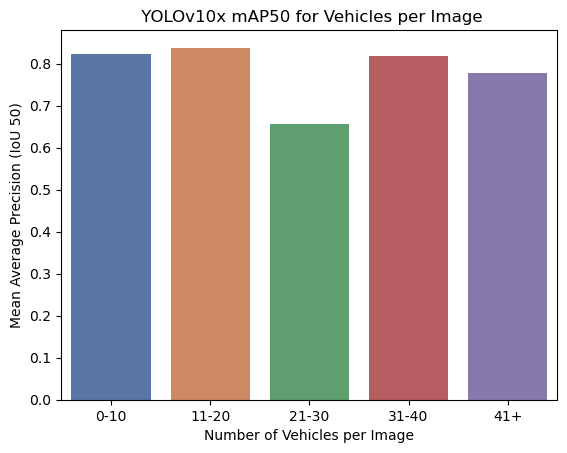

In [173]:
# barplot of mAP50 for each category of validation vehicles per image
yolov10_map50_veh_per_image_df = pd.DataFrame([
    ["0-10", metrics_v10_20_epochs_0_10_veh.box.map50],
    ["11-20", metrics_v10_20_epochs_11_20_veh.box.map50],
    ["21-30",  metrics_v10_20_epochs_21_30_veh.box.map50],
    ["31-40", metrics_v10_20_epochs_31_40_veh.box.map50],
    ["41+", metrics_v10_20_epochs_41_veh.box.map50]],
    columns=["num_veh_per_image", "map50"])

fig = sns.barplot(x=yolov10_map50_veh_per_image_df["num_veh_per_image"], y=yolov10_map50_veh_per_image_df["map50"])
fig.set_xlabel("Number of Vehicles per Image")
fig.set_ylabel("Mean Average Precision (IoU 50)")
fig.set_title(" YOLOv10x mAP50 for Vehicles per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/yolov10_ap50_veh_per_image.png", bbox_inches="tight")
plt.show()

### Comparison Between YOLOv8x and YOLOv10x
#### AP50 All Classes

In [102]:
# combine both models ap50 into one df
combined_ap50_df = pd.DataFrame(
    [["Articulated", test_metrics_v8_10_epochs.box.ap50[0],"YOLOv8x"],
    ["Articulated", test_metrics_v10_20_epochs.box.ap50[0],"YOLOv10x"],
    ["Bus", test_metrics_v8_10_epochs.box.ap50[1],"YOLOv8x"],
    ["Bus", test_metrics_v10_20_epochs.box.ap50[1],"YOLOv10x"],
    ["Car", test_metrics_v8_10_epochs.box.ap50[2],"YOLOv8x"],
    ["Car", test_metrics_v10_20_epochs.box.ap50[2],"YOLOv10x"],
    ["Coach", test_metrics_v8_10_epochs.box.ap50[3],"YOLOv8x"],
    ["Coach", test_metrics_v10_20_epochs.box.ap50[3],"YOLOv10x"],
    ["LGV", test_metrics_v8_10_epochs.box.ap50[4],"YOLOv8x"],
    ["LGV", test_metrics_v10_20_epochs.box.ap50[4],"YOLOv10x"],
    ["Rigid 2 Axle", test_metrics_v8_10_epochs.box.ap50[5],"YOLOv8x"],
    ["Rigid 2 Axle", test_metrics_v10_20_epochs.box.ap50[5],"YOLOv10x"],
    ["Rigid 3 Axle", test_metrics_v8_10_epochs.box.ap50[6],"YOLOv8x"],
    ["Rigid 3 Axle", test_metrics_v10_20_epochs.box.ap50[6],"YOLOv10x"],
    ["Rigid 4 Axle", test_metrics_v8_10_epochs.box.ap50[7],"YOLOv8x"],
    ["Rigid 4 Axle", test_metrics_v10_20_epochs.box.ap50[7],"YOLOv10x"],
    ["Taxi", test_metrics_v8_10_epochs.box.ap50[8],"YOLOv8x"],
    ["Taxi", test_metrics_v10_20_epochs.box.ap50[8],"YOLOv10x"]],
    columns=["Class Name", "AP50", "Model"]
)

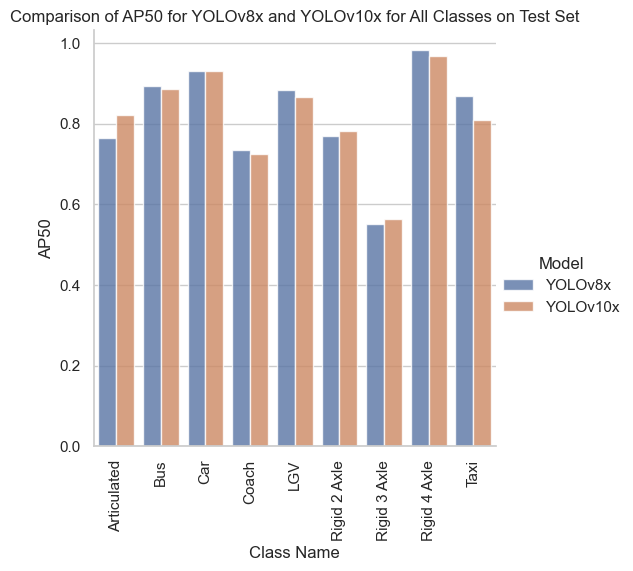

In [132]:
# grouped barplot of AP50 on test set for all classes
sns.set_palette("deep")
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=combined_ap50_df, x="Class Name", y="AP50", 
                  hue="Model", alpha=0.8).set(title="Comparison of AP50 for YOLOv8x and YOLOv10x for All Classes on Test Set")
fig.set_xticklabels(rotation=90)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/ap50_comparison_all_classes.png", bbox_inches="tight")
plt.show()

#### AP50 Priority Classes only

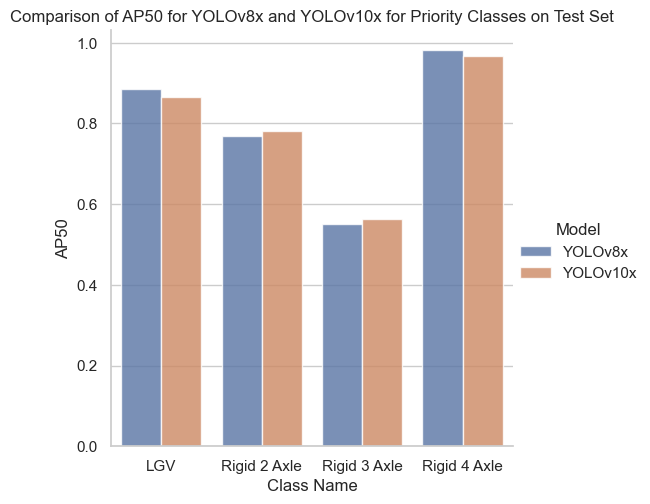

In [130]:
# combine both models ap50 into one df, priority classes only
combined_ap50_priority_only_df = pd.DataFrame(
    [["LGV", test_metrics_v8_10_epochs.box.ap50[4],"YOLOv8x"],
    ["LGV", test_metrics_v10_20_epochs.box.ap50[4],"YOLOv10x"],
    ["Rigid 2 Axle", test_metrics_v8_10_epochs.box.ap50[5],"YOLOv8x"],
    ["Rigid 2 Axle", test_metrics_v10_20_epochs.box.ap50[5],"YOLOv10x"],
    ["Rigid 3 Axle", test_metrics_v8_10_epochs.box.ap50[6],"YOLOv8x"],
    ["Rigid 3 Axle", test_metrics_v10_20_epochs.box.ap50[6],"YOLOv10x"],
    ["Rigid 4 Axle", test_metrics_v8_10_epochs.box.ap50[7],"YOLOv8x"],
    ["Rigid 4 Axle", test_metrics_v10_20_epochs.box.ap50[7],"YOLOv10x"]],
    columns=["Class Name", "AP50", "Model"]
)
# grouped barplot of AP50 on test set for priority classes only
sns.set_palette("deep")
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=combined_ap50_priority_only_df, x="Class Name", y="AP50", 
                  hue="Model", alpha=0.8).set(title="Comparison of AP50 for YOLOv8x and YOLOv10x for Priority Classes on Test Set")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/ap50_comparison_priority_classes.png", bbox_inches="tight")
plt.show()

#### mAP50 for Number of Vehicles per Image

In [105]:
# combined df of mAP50 for number of vehicles per image, both models
combined_map50_df = pd.DataFrame([
    ["0-10", metrics_v8_10_epochs_0_10_veh.box.map50, "YOLOv8x"],
    ["0-10", metrics_v10_20_epochs_0_10_veh.box.map50, "YOLOv10x"],
    ["11-20", metrics_v8_10_epochs_11_20_veh.box.map50, "YOLOv8x"],
    ["11-20", metrics_v10_20_epochs_11_20_veh.box.map50, "YOLOv10x"],
    ["21-30", metrics_v8_10_epochs_21_30_veh.box.map50, "YOLOv8x"],
    ["21-30", metrics_v10_20_epochs_21_30_veh.box.map50, "YOLOv10x"],
    ["31-40", metrics_v8_10_epochs_31_40_veh.box.map50, "YOLOv8x"],
    ["31-40", metrics_v10_20_epochs_31_40_veh.box.map50, "YOLOv10x"],
    ["41+", metrics_v8_10_epochs_41_veh.box.map50, "YOLOv8x"],
    ["41+", metrics_v10_20_epochs_41_veh.box.map50, "YOLOv10x"]],
    columns=["Number of Vehicles per Image", "mAP50", "Model"])

In [397]:
combined_map50_df

,Number of Vehicles per Image,mAP50,Model
0,0-10,0.820183,YOLOv8
1,0-10,0.822564,YOLOv10
2,11-20,0.851448,YOLOv8
3,11-20,0.837717,YOLOv10
4,21-30,0.620143,YOLOv8
5,21-30,0.657196,YOLOv10
6,31-40,0.812922,YOLOv8
7,31-40,0.816995,YOLOv10
8,41+,0.833562,YOLOv8
9,41+,0.777381,YOLOv10


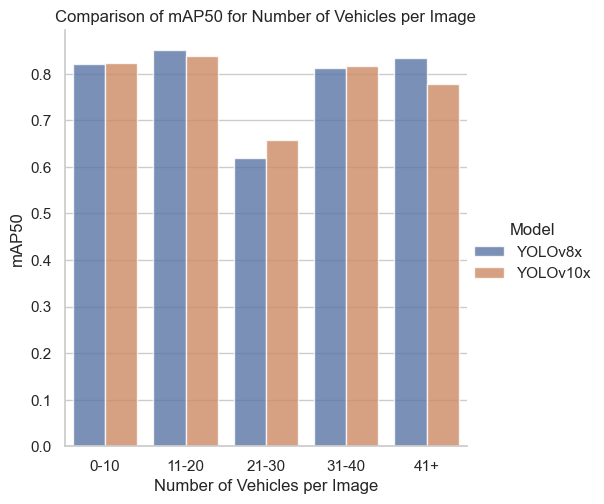

In [128]:
# grouped barplot mAP50 for number of vehicles per image in validation set
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=combined_map50_df, x="Number of Vehicles per Image", y="mAP50", 
                  hue="Model", alpha=0.8).set(title="Comparison of mAP50 for Number of Vehicles per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/map50_comparison_veh_per_image.png", bbox_inches="tight")
plt.show()

#### Model Processing Speed Comparison

In [4]:
# df for processing speed stages
processing_time_df = pd.DataFrame([
    ["Preprocess", 1.8, "YOLOv8x"],
    ["Preprocess", 1.7, "YOLOv10x"],
    ["Inference", 12.5, "YOLOv8x"],
    ["Inference", 18.9, "YOLOv10x"],
    ["Postprocess", 1.4, "YOLOv8x"],
    ["Postprocess", 0.5, "YOLOv10x"],
    ["Total Time", 15.7, "YOLOv8x"],
    ["Total Time", 21.1, "YOLOv10x"]],
    columns=["Processing Stage", "Time Taken (ms)", "Model"])

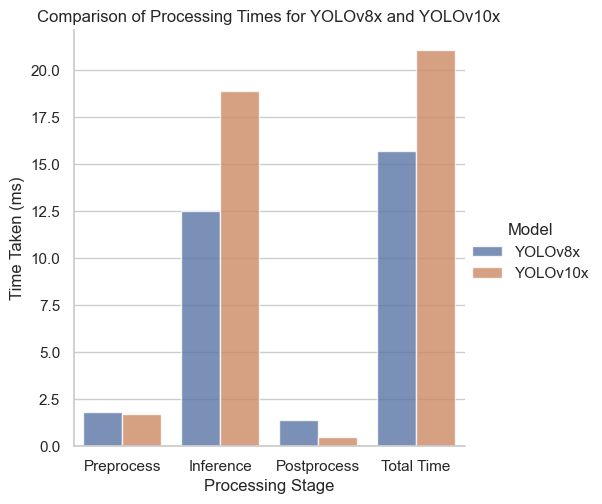

In [19]:
# stacked barplot of processing stage speed for both models
sns.set_palette("deep")
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar", data=processing_time_df, x="Processing Stage", y="Time Taken (ms)", hue="Model", alpha=0.8).set(
    title="Comparison of Processing Times for YOLOv8x and YOLOv10x")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/processing_times_comparison.png", bbox_inches="tight")
plt.show()